In [98]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Ftrl, Nadam, RMSprop


In [54]:
train = ImageDataGenerator()
test = ImageDataGenerator()

train_dataset = train.flow_from_directory(directory="data/train",
                                          target_size=(150,150),
                                          batch_size = 10,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(directory="data/test",
                                          target_size=(150,150),
                                          batch_size =10,
                                          class_mode = 'binary')
                                         

Found 312 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [55]:
test_dataset.class_indices

{'chilli': 0, 'turmeric': 1}

In [56]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for chilli or 1 for turmeric
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [58]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
#steps_per_epoch = train_imagesize/batch_size
filepath = "data/"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_dataset,
         steps_per_epoch = 10,
         epochs = 10, verbose=1,
         validation_data = test_dataset
       
         )

Epoch 1/10
10/10 [==============================] - 4s 384ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0172 - val_accuracy: 0.9917
Epoch 2/10
10/10 [==============================] - 4s 385ms/step - loss: 0.0593 - accuracy: 0.9800 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 4s 392ms/step - loss: 0.0736 - accuracy: 0.9600 - val_loss: 0.0237 - val_accuracy: 0.9917
Epoch 4/10
10/10 [==============================] - 4s 398ms/step - loss: 0.0468 - accuracy: 0.9900 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 4s 381ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 4s 373ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 4s 377ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 

In [60]:
def predictImage(filename):
    img = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img)
 
    Y = image.img_to_array(img)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("TURMERIC",fontsize=30)
        print("TURMERIC")
    
    elif val == 0:
        
        plt.xlabel("CHILLI",fontsize=30)
        print("CHILLI")

[[0.]]
CHILLI


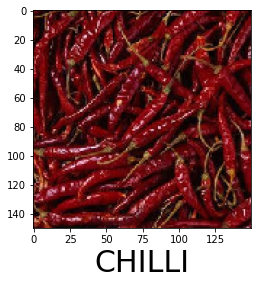

In [85]:
predictImage(r"C:\Users\kmgs4\OneDrive\Documents\GitHub\Spices-Classifier-main\image2.jpg")

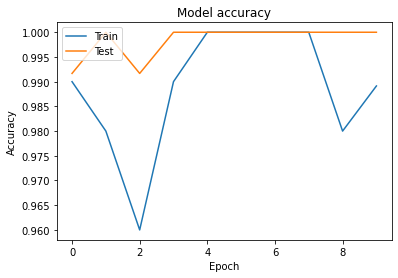

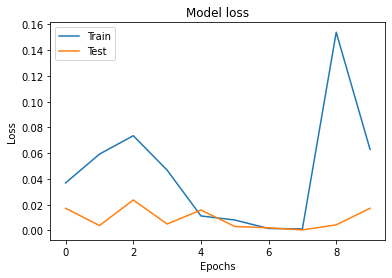

In [77]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [79]:
#steps_per_epoch = train_imagesize/batch_size
filepath = "data/"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_dataset,
         steps_per_epoch = 10,
         epochs = 100, verbose=1,
         validation_data = test_dataset
       
         )

Epoch 1/100
10/10 [==============================] - 4s 392ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9833
Epoch 2/100
10/10 [==============================] - 4s 374ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/100
10/10 [==============================] - 3s 368ms/step - loss: 0.0240 - accuracy: 0.9891 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 4s 365ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 3s 369ms/step - loss: 5.7977e-04 - accuracy: 1.0000 - val_loss: 3.1499e-04 - val_accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 4s 363ms/step - loss: 6.0126e-05 - accuracy: 1.0000 - val_loss: 1.2927e-04 - val_accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 3s 351ms/step - loss: 1.2203 - accuracy: 0.8804 - val_loss: 0.0300 - val_

Epoch 58/100
10/10 [==============================] - 4s 361ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9917
Epoch 59/100
10/10 [==============================] - 4s 371ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 0.9917
Epoch 60/100
10/10 [==============================] - 4s 357ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9917
Epoch 61/100
10/10 [==============================] - 4s 363ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9917
Epoch 62/100
10/10 [==============================] - 4s 369ms/step - loss: 9.2739e-04 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 0.9917
Epoch 63/100
10/10 [==============================] - 3s 354ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 0.9917
Epoch 64/100
10/10 [==============================] - 4s 360ms/step - loss: 2.4240e-04 - accuracy: 1.0000 - val_loss: 0.0184 - val_a

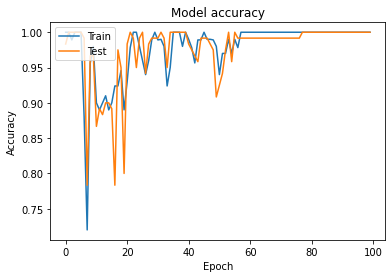

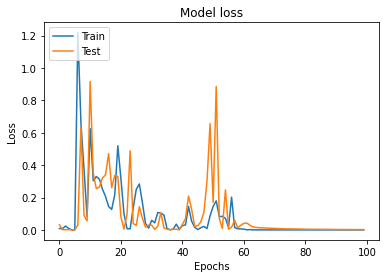

In [80]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[[1.]]
TURMERIC


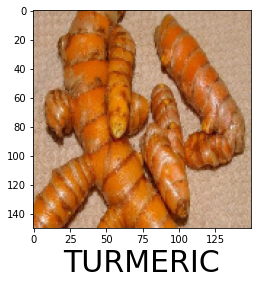

In [86]:
predictImage(r"C:\Users\kmgs4\OneDrive\Documents\GitHub\Spices-Classifier-main\image.jpg")

In [91]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for chilli or 1 for turmeric
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='softmax'))

In [92]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [93]:
#steps_per_epoch = train_imagesize/batch_size
filepath = "data/"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_dataset,
         steps_per_epoch = 10,
         epochs = 10, verbose=1,
         validation_data = test_dataset
       
         )

Epoch 1/10
10/10 [==============================] - 5s 414ms/step - loss: 37.5884 - accuracy: 0.3700 - val_loss: 0.5194 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 4s 385ms/step - loss: 0.5301 - accuracy: 0.5800 - val_loss: 0.3687 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 4s 413ms/step - loss: 0.3526 - accuracy: 0.5100 - val_loss: 0.1714 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 4s 378ms/step - loss: 0.1341 - accuracy: 0.5100 - val_loss: 0.1101 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 4s 362ms/step - loss: 0.2071 - accuracy: 0.5326 - val_loss: 0.1961 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 4s 385ms/step - loss: 0.1651 - accuracy: 0.5300 - val_loss: 0.0720 - val_accuracy: 0.5000
Epoch 7/10
10/10 [==============================] - 4s 372ms/step - loss: 0.0610 - accuracy: 0.5100 - val_loss: 0.0243 - val_accuracy: 0.5000
Epoch

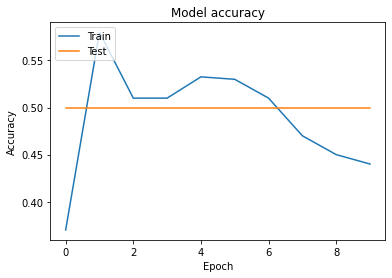

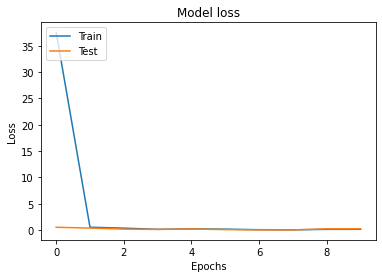

In [94]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [96]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for chilli or 1 for turmeric
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [99]:
optm = RMSprop(learning_rate=0.001)
model.compile(optimizer=optm, loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
#steps_per_epoch = train_imagesize/batch_size
filepath = "data/"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_dataset,
         steps_per_epoch = 10,
         epochs = 10, verbose=1,
         validation_data = test_dataset
       
         )

Epoch 1/10
10/10 [==============================] - 6s 557ms/step - loss: 219.0397 - accuracy: 0.5100 - val_loss: 2.0674 - val_accuracy: 0.5083
Epoch 2/10
10/10 [==============================] - 4s 415ms/step - loss: 2.3570 - accuracy: 0.5100 - val_loss: 0.6875 - val_accuracy: 0.6750
Epoch 3/10
10/10 [==============================] - 4s 435ms/step - loss: 0.9395 - accuracy: 0.5700 - val_loss: 2.6751 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 4s 418ms/step - loss: 1.1642 - accuracy: 0.5978 - val_loss: 0.6124 - val_accuracy: 0.6417
Epoch 5/10
10/10 [==============================] - 4s 397ms/step - loss: 1.4924 - accuracy: 0.4600 - val_loss: 0.5742 - val_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 4s 402ms/step - loss: 0.7935 - accuracy: 0.5870 - val_loss: 7.7874 - val_accuracy: 0.5000
Epoch 7/10
10/10 [==============================] - 4s 415ms/step - loss: 3.3013 - accuracy: 0.5600 - val_loss: 0.8481 - val_accuracy: 0.5000
Epoc

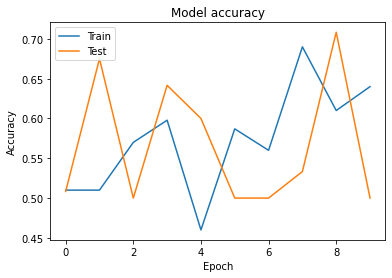

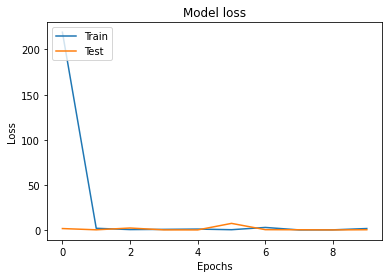

In [101]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [102]:
optm = SGD(learning_rate=0.001)
model.compile(optimizer=optm, loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
#steps_per_epoch = train_imagesize/batch_size
filepath = "data/"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_dataset,
         steps_per_epoch = 10,
         epochs = 10, verbose=1,
         validation_data = test_dataset
       
         )

Epoch 1/10
10/10 [==============================] - 4s 371ms/step - loss: 0.7038 - accuracy: 0.5652 - val_loss: 0.6444 - val_accuracy: 0.6583
Epoch 2/10
10/10 [==============================] - 3s 350ms/step - loss: 0.6460 - accuracy: 0.6630 - val_loss: 0.6153 - val_accuracy: 0.7083
Epoch 3/10
10/10 [==============================] - 4s 358ms/step - loss: 0.5284 - accuracy: 0.8804 - val_loss: 0.4297 - val_accuracy: 0.9417
Epoch 4/10
10/10 [==============================] - 3s 349ms/step - loss: 0.3712 - accuracy: 0.8913 - val_loss: 0.3264 - val_accuracy: 0.9167
Epoch 5/10
10/10 [==============================] - 4s 368ms/step - loss: 0.3285 - accuracy: 0.8700 - val_loss: 0.3130 - val_accuracy: 0.9583
Epoch 6/10
10/10 [==============================] - 4s 374ms/step - loss: 0.3061 - accuracy: 0.9100 - val_loss: 0.2453 - val_accuracy: 0.9500
Epoch 7/10
10/10 [==============================] - 4s 362ms/step - loss: 0.2747 - accuracy: 0.8900 - val_loss: 0.2114 - val_accuracy: 0.9667
Epoch 

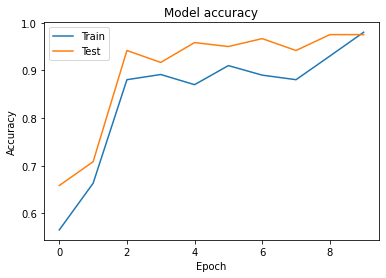

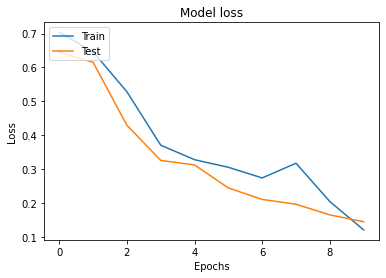

In [104]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()